# __Assignment 1: MatPlotLib Dashboard__
### Sixian Chen
### CIS 9655 Data Visualization


----


### Introduction
#### Objective: the ojective of this data analysis study is to analyze how the total tuition price, net cost, scholarship and grants, and other factors impact a student's income level.
#### Source: https://www.kaggle.com/jessemostipak/college-tuition-diversity-and-pay?select=tuition_income.csv
#### About the dataset: This dataset shows the costs of college tuition in the US on their own, by geographic area, degree type, and/or student's salary.  The data originally came from the US Department of Education.
----


In [170]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from numpy.random import randn

%matplotlib inline

In [171]:
df = pd.read_csv('A1.csv')

df['paid %'] = df['net_cost']/df['total_price'] *100
df['paid %'] = df['paid %'].round(2) 
df['est income'] = df['income_lvl'].map({'0 to 30,000': 15000 , '30,001 to 48,000': 39000, '48_001 to 75,000': 61500, '75,001 to 110,000': 92500, 'Over 110,000': 125000})

print("Preview Of The Modified Dataset")
df.head(5)

Preview Of The Modified Dataset


,name,state,total_price,year,campus,net_cost,income_lvl,paid %,est income
0,Piedmont International University,NC,20174,2016,On Campus,11475.00000,"0 to 30,000",56.88,15000
1,Piedmont International University,NC,20174,2016,On Campus,11451.00000,"30,001 to 48,000",56.76,39000
2,Piedmont International University,NC,20174,2016,On Campus,16229.00000,"48_001 to 75,000",80.45,61500
3,Piedmont International University,NC,20174,2016,On Campus,15592.00000,"75,001 to 110,000",77.29,92500
4,Piedmont International University,NC,20514,2017,On Campus,11668.39249,"0 to 30,000",56.88,15000


#### The preview of the dataset shows the columns: (school)name, state, total price, year, campus, net cost, and income level.  In order to analyze the impact of scholarships and grants, a column "paid %" is created, which is calculated by net cost over total tuition price, showing the percentage of remaining of tuition a student need to pay over the total tuition. A column of estimated income is also created in order to quantify the income level of student.
____


### Income Level Distribution

,name
income_lvl,
"0 to 30,000",44969
"30,001 to 48,000",43384
"48_001 to 75,000",42600
"75,001 to 110,000",40403
"Over 110,000",37656


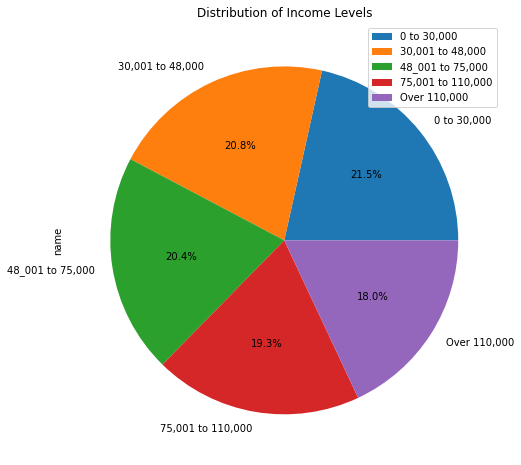

In [172]:
df_byIL = df.groupby(['income_lvl']).agg({'name':'count'})
df_byIL

plt0 = df_byIL.plot.pie( y='name',figsize=(8,8),autopct='%1.1f%%')
plt0.set_title("Distribution of Income Levels")

df_byIL

####  The pie chart above shows that, the distribution of income level of the students are distributed evenly. Students with income level in "0 to 30000" has the highest percentage, which is 20.8%, and students with income level in "over 110,000" has the lowest percentage, which is 18.0%.
----

### Impact of the change of total price and net cost for college tuition from 2010 to 2018

,net_cost,total_price,paid %
year,,,
2018,16385.55,32586.02,51.08
2017,15863.35,31742.10,50.62
2016,17605.68,31605.59,57.63
2015,17392.99,30860.98,58.08
2014,17212.06,30092.52,58.78
2013,17052.35,29362.20,59.66
2012,17071.42,28813.65,60.69
2011,16632.92,27544.71,61.45
2010,15138.99,24753.18,60.13


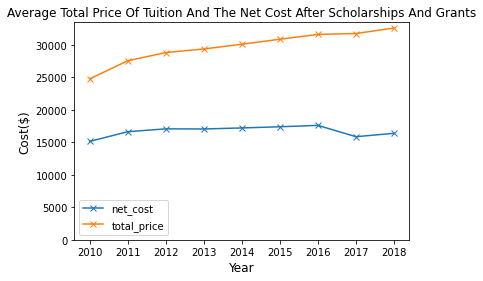

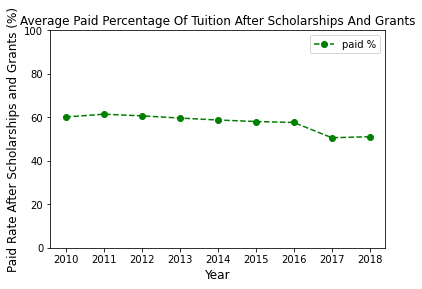

In [173]:
df_byYear = df.groupby(['year']).agg({'net_cost':'mean','total_price':'mean'}).round(2).sort_values(by=['year'],ascending=False)

plt1 = df_byYear.plot( marker='x', linestyle='-')
plt1.set_ylim(ymin=0)
plt1.set_title("Average Total Price Of Tuition And The Net Cost After Scholarships And Grants", fontsize=12)
plt1.set_xlabel('Year', fontsize=12)
plt1.set_ylabel('Cost($)', fontsize=12)

df_byPaidR = df.groupby(['year']).agg({'paid %':'mean'}).round(2).sort_values(by=['year'],ascending=False)

plt2 = df_byPaidR.plot(c='g', marker='o', linestyle='dashed')
plt2.set_ylim(ymin=0)
plt2.set_ylim(ymax=100)
plt2.set_title("Average Paid Percentage Of Tuition After Scholarships And Grants", fontsize=12)
plt2.set_xlabel('Year', fontsize=12)
plt2.set_ylabel('Paid Rate After Scholarships and Grants (%)', fontsize=12)

df_byPLT12 = df.groupby(['year']).agg({'net_cost':'mean','total_price':'mean','paid %':'mean'}).round(2).sort_values(by=['year'],ascending=False)
df_byPLT12

#### The first graph above shows that, in average, the net cost and the total tuition price are increasing, except there was a drop in 2017 for both net cost and total price. 
#### On the other hand, the second graph shows the percentage of remaining portion of tuition students paid after applying scholarships and grants. In average, it has a decreasing trend, which means that the schalarship and grants students paid a smaller portion of their total cost of tuition from 2010 to 2018.
____


Text(0, 0.5, 'Number of Students')

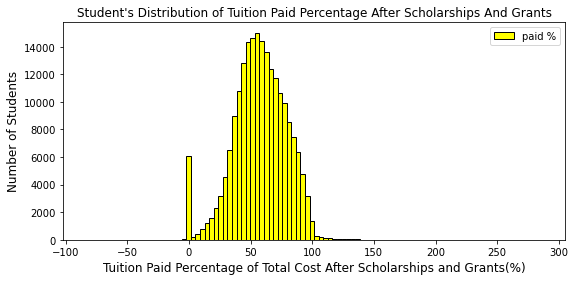

In [174]:
df_byPR=df[['paid %']]

plt3 = df_byPR.plot.hist(bins=100,histtype='bar',figsize=(9,4),color='yellow',edgecolor='black')

plt3.set_title("Student's Distribution of Tuition Paid Percentage After Scholarships And Grants", fontsize=12)
plt3.set_xlabel('Tuition Paid Percentage of Total Cost After Scholarships and Grants(%)', fontsize=12)
plt3.set_ylabel('Number of Students', fontsize=12)

#### The histogram above shows the majority of students need to pay around 50% of their total cost of tuition after scholarships and grants applied. One interesting finding is, there are around 6000 students did not need to pay for their tuition, and some students has a negative paid percentage. In this case, for those who has a negative paid percentage, they have higher value of scholarships and grants than tuition cost. In other words, some students gain money by receiving scholarships and grants.

### Does on campus programs increase the income level of students?

campus,On Campus,Off Campus
total_price,33244.63,28329.18
net_cost,18193.89,15989.97
est income,65635.93,63480.52


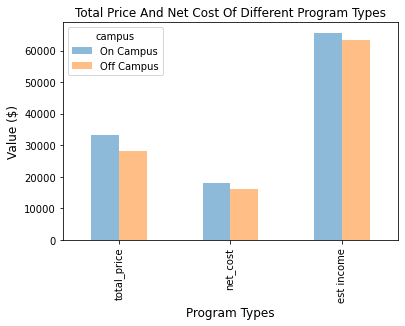

In [175]:
df_byCampus = df.groupby(['campus']).agg({'total_price':'mean','net_cost':'mean','est income':'mean'}).round(2).sort_values(by=['total_price'],ascending=False)
df_byCampus = df_byCampus.T

plt4 = df_byCampus.plot.bar(alpha=0.5)
plt4.set_title("Total Price And Net Cost Of Different Program Types", fontsize=12)
plt4.set_xlabel('Program Types', fontsize=12)
plt4.set_ylabel('Value ($)', fontsize=12)

df_byCampus

#### The bar chart above shows that, the total price and the net cost of off campus program is cheaper than on campus programs. On the other hand, the average estimated income for students who enrolled on campus program is higher than those who enrolled off campus program.
----

### Baruch College Student's distribution on income level and paid percentage.

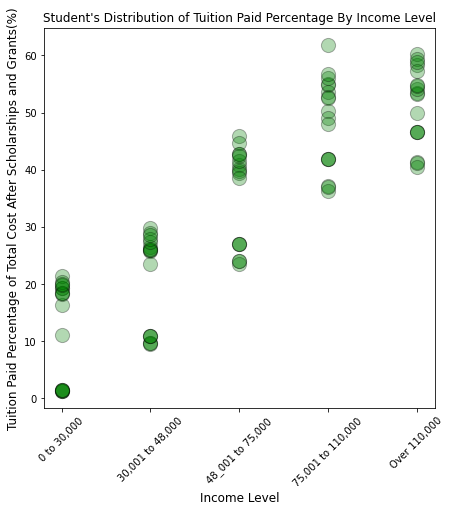

In [176]:
df_Baruch = df[df['name']=='CUNY Bernard M Baruch College']
df_Baruch
plt5 = df_Baruch.plot.scatter(x='income_lvl',
                      y='paid %',
                      figsize=(7,7), marker='o', color='green',s=200,edgecolor='black',
                      alpha = 0.3)

plt5.set_title("Student's Distribution of Tuition Paid Percentage By Income Level", fontsize=12)
plt5.set_xlabel('Income Level', fontsize=12)
plt5.set_ylabel('Tuition Paid Percentage of Total Cost After Scholarships and Grants(%)', fontsize=12)
plt5.set_xticklabels(df_Baruch['income_lvl'],rotation=45)

plt5

#### The scatter plot above shows that for those students who has lower income levels, such as "0 to 30,000" and "30,001 to 48,000", they mostly have paid ratios under 30%, some of them even did not need to pay for their tuition. However, for those who has higher income levels, such as "75,001 to 110,000" and "over 110,000", most of them need to paid 40%to 60% of their total tuition cost. 
----

### Conclusion

<ipython-input-177-f5e3eaa9d526>:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  axs[0, 0].pie(df_byIL,labels=df_byIL.index,autopct='%1.1f%%')


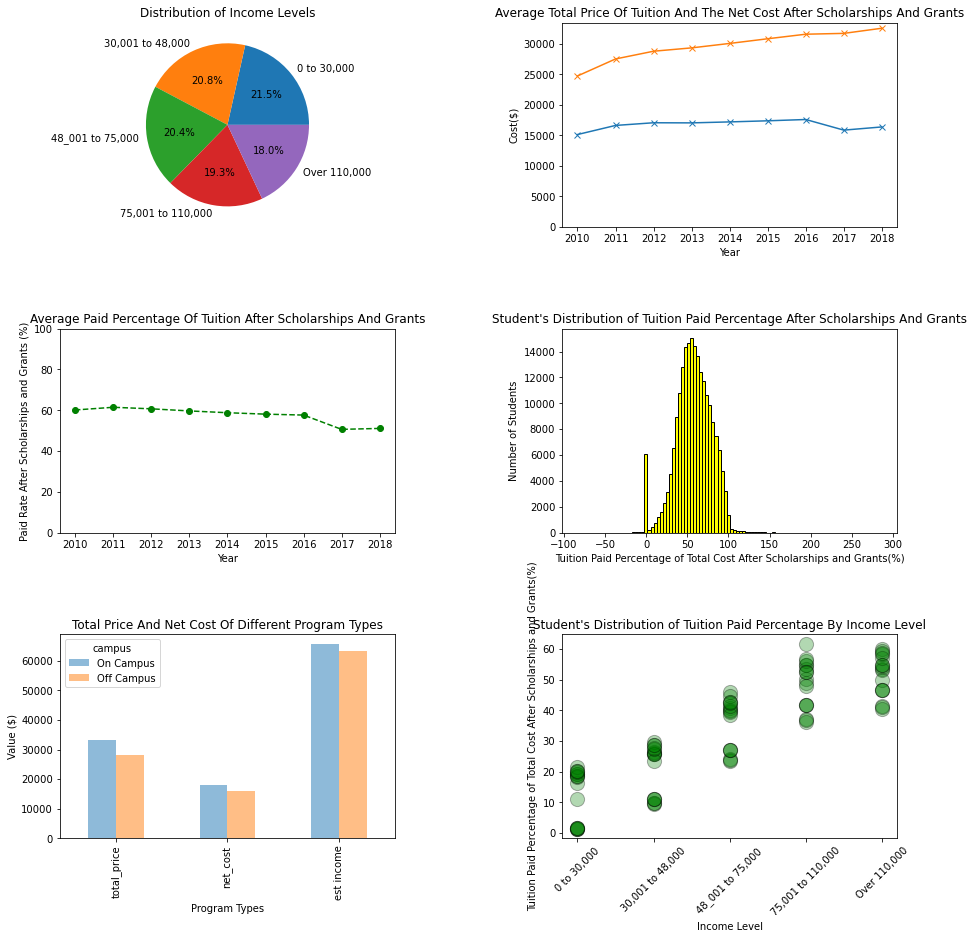

In [177]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
plt.subplots_adjust( wspace=0.5, hspace=0.5)

axs[0, 0].pie(df_byIL,labels=df_byIL.index,autopct='%1.1f%%')
axs[0, 0].set_title('Distribution of Income Levels')

axs[0, 1].plot(df_byYear,marker='x', linestyle='-' )
axs[0, 1].set_title('Axis [0,1]')
axs[0, 1].set_title('Axis [0,1]')
axs[0, 1].set_ylim(ymin=0)
axs[0, 1].set_title("Average Total Price Of Tuition And The Net Cost After Scholarships And Grants")
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Cost($)')


axs[1, 0].plot(df_byPaidR,c='g', marker='o', linestyle='dashed')
axs[1, 0].set_ylim(ymin=0)
axs[1, 0].set_ylim(ymax=100)
axs[1, 0].set_title("Average Paid Percentage Of Tuition After Scholarships And Grants")
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Paid Rate After Scholarships and Grants (%)')


axs[1, 1].hist(df_byPR['paid %'],bins=100,histtype='bar',color='yellow',edgecolor='black')
axs[1, 1].set_title("Student's Distribution of Tuition Paid Percentage After Scholarships And Grants")
axs[1, 1].set_xlabel('Tuition Paid Percentage of Total Cost After Scholarships and Grants(%)')
axs[1, 1].set_ylabel('Number of Students')

df_byCampus.plot.bar(ax=axs[2,0], alpha=.5)
axs[2, 0].set_title("Total Price And Net Cost Of Different Program Types")
axs[2, 0].set_xlabel('Program Types')
axs[2, 0].set_ylabel('Value ($)')

axs[2, 1].scatter( x=df_Baruch['income_lvl'], y=df_Baruch['paid %'], marker='o', color='green',s=200,edgecolor='black',alpha = 0.3)
axs[2, 1].set_title("Student's Distribution of Tuition Paid Percentage By Income Level")
axs[2, 1].set_xlabel('Income Level')
axs[2, 1].set_ylabel('Tuition Paid Percentage of Total Cost After Scholarships and Grants(%)')
axs[2, 1].set_xticklabels(df_Baruch['income_lvl'],rotation=45)

plt.show()

### __3 Minutes Story__
#### Many students who are going to gradute soon usually have a hard time on deciding and choosing their college programs. One of the major concern is, do more expensive and higher cost programs bring you higher income when you graduate? In order to find out the relationship between total tuition cost, net cost, and student's income level, I found a dataset from Kaggle which includes student's tuition cost, income level, and other relevant information. After organizing and visualizing the data, I found that, the distribution of student's income levels are even. Comparing years over years ,even though the total tuition price and the net cost are increasing execpt there was a drop in 2017, the portion students need to pay for college is decreasing, which means scholarships and grants cover a bigger part student's total tuition. In average, most of the students need to pay around 50% of their tuition after receiving scholarships and grants. Some of the student even do not need to pay for their tuition since their tuition had a full coverage. Furthermore, program type also had an impact on student income level. For the students who enrolled off campus programs, in avearge they paid less on tuition, but earned less after graduate, than those who enrolled on campus programs. In Baruch College, the scatter plot graph shows students who need to pay a higher portion of total tuition after receiving scholarships and grants, usually have a higher income level. It leads me an assumption that, students who pay higher portion of total tuition, might enroll a more expensive program such as MFE, and would find a job in an industry like investment banking, which brings high pay rate.
#### In this analysis, we can conclude that, in average, students who enrolled a more expensive on campus program, usually have a higher pay rate after graduate. One good thing is, even though the tuition cost is increasing years over years, the paid % is decreasing, which means that students were provided higher value of scholarships and grants to cover their total tuition cost. 